In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Drop the species column (not needed for clustering)
# Note: The Iris dataset from sklearn does not have a 'species' column in the data array.
# The target (species) is stored separately in iris.target.
print("First 5 rows of the dataset:")
print(data.head())

# Standardize the data (optional but recommended for clustering)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


C:\Users\Kamaru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


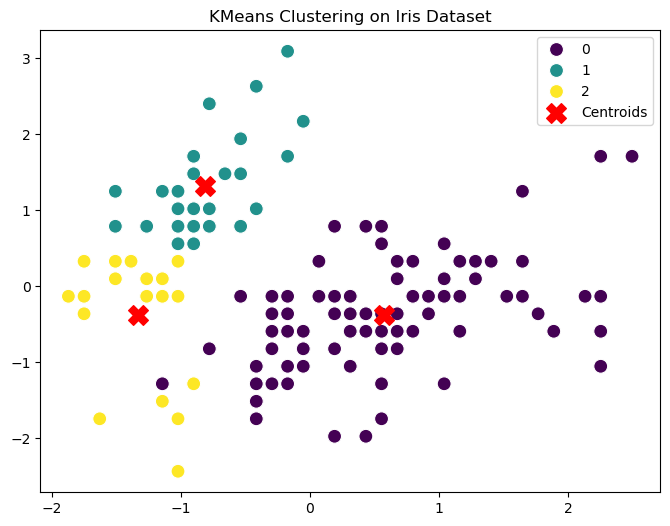

In [14]:
# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Visualization of KMeans Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=kmeans_labels, palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('KMeans Clustering on Iris Dataset')
plt.legend()
plt.show()


In [ ]:
# Brief description of KMeans clustering
"""
KMeans clustering is an unsupervised machine learning algorithm that partitions the dataset into 'k' clusters.
It works by iteratively assigning data points to the nearest cluster centroid and updating the centroids based on the mean of the assigned points.
The algorithm aims to minimize the within-cluster sum of squares (WCSS).
"""
Why KMeans is suitable for the Iris dataset
"""
KMeans is suitable for the Iris dataset because:
1. The dataset is small and well-structured.
2. The number of clusters (k=3) is known (since there are 3 species of Iris flowers).
3. KMeans works well with numerical data and can capture the natural grouping of the data.
"""

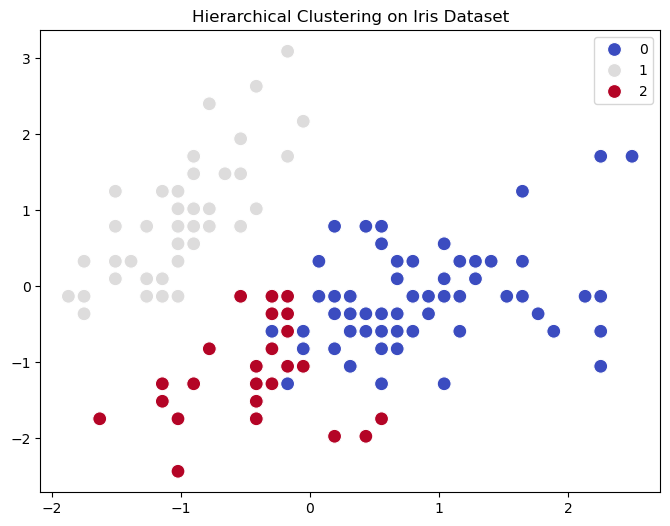

In [12]:
# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(data_scaled)

# Visualization of Hierarchical Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=hierarchical_labels, palette='coolwarm', s=100)
plt.title('Hierarchical Clustering on Iris Dataset')
plt.show()

In [ ]:
# Brief description of Hierarchical clustering
"""
Hierarchical clustering is an unsupervised algorithm that builds a hierarchy of clusters.
It can be either agglomerative (bottom-up) or divisive (top-down).
Agglomerative clustering starts with each data point as a separate cluster and merges the closest pairs of clusters iteratively.
"""

# Why Hierarchical clustering is suitable for the Iris dataset
"""
Hierarchical clustering is suitable for the Iris dataset because:
1. It provides a dendrogram that helps visualize the relationships between clusters.
2. It does not require specifying the number of clusters in advance (though we can choose a cut-off).
3. It works well with small datasets like Iris.
"""

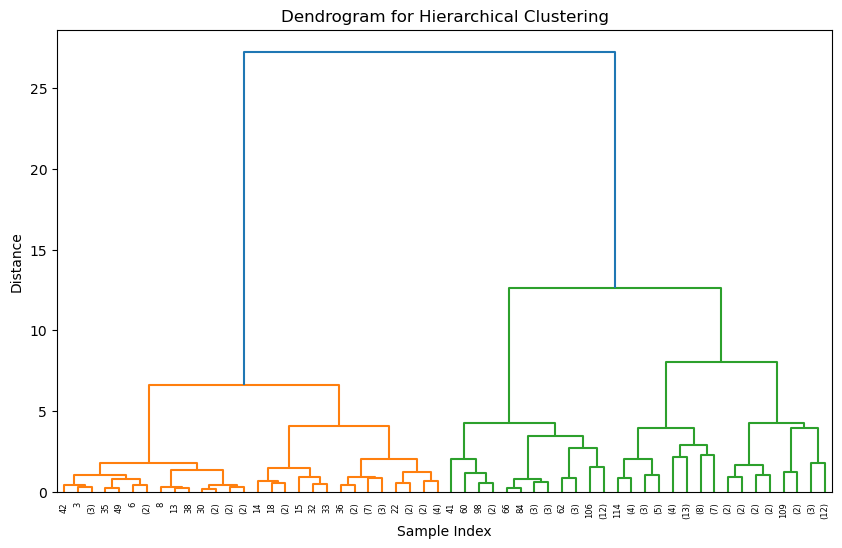

In [22]:
# Dendrogram for Hierarchical Clustering
plt.figure(figsize=(10, 6))
linkage_matrix = linkage(data_scaled, method='ward')
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()
